#1.INTRODUCTION

* To clean and detect the distribution of persons usage of different credit cards and deliquency rate.

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [17]:
import matplotlib.pyplot as plt

In [22]:
import seaborn as sns

In [5]:
df=pd.read_csv('Delinquency_prediction_dataset.csv')

#2. DATA SET OVERVIEW

In [9]:
df.head()

,Customer_ID,Age,Income,Credit_Score,Credit_Utilization,Missed_Payments,Delinquent_Account,Loan_Balance,Debt_to_Income_Ratio,Employment_Status,Account_Tenure,Credit_Card_Type,Location,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6
0,CUST0001,56,165580.0,398.0,0.390502,3,0,16310.0,0.317396,EMP,18,Student,Los Angeles,Late,Late,Missed,Late,Missed,Late
1,CUST0002,69,100999.0,493.0,0.312444,6,1,17401.0,0.196093,Self-employed,0,Standard,Phoenix,Missed,Missed,Late,Missed,On-time,On-time
2,CUST0003,46,188416.0,500.0,0.359930,0,0,13761.0,0.301655,Self-employed,1,Platinum,Chicago,Missed,Late,Late,On-time,Missed,Late
3,CUST0004,32,101672.0,413.0,0.371400,3,0,88778.0,0.264794,Unemployed,15,Platinum,Phoenix,Late,Missed,Late,Missed,Late,Late
4,CUST0005,60,38524.0,487.0,0.234716,2,0,13316.0,0.510583,Self-employed,11,Standard,Phoenix,Missed,On-time,Missed,Late,Late,Late


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer_ID           500 non-null    object 
 1   Age                   500 non-null    int64  
 2   Income                461 non-null    float64
 3   Credit_Score          498 non-null    float64
 4   Credit_Utilization    500 non-null    float64
 5   Missed_Payments       500 non-null    int64  
 6   Delinquent_Account    500 non-null    int64  
 7   Loan_Balance          471 non-null    float64
 8   Debt_to_Income_Ratio  500 non-null    float64
 9   Employment_Status     500 non-null    object 
 10  Account_Tenure        500 non-null    int64  
 11  Credit_Card_Type      500 non-null    object 
 12  Location              500 non-null    object 
 13  Month_1               500 non-null    object 
 14  Month_2               500 non-null    object 
 15  Month_3               5

In [11]:
df.isnull().sum()

,0
Customer_ID,0
Age,0
Income,39
Credit_Score,2
Credit_Utilization,0
Missed_Payments,0
Delinquent_Account,0
Loan_Balance,29
Debt_to_Income_Ratio,0
Employment_Status,0


In [12]:
df.describe()

,Age,Income,Credit_Score,Credit_Utilization,Missed_Payments,Delinquent_Account,Loan_Balance,Debt_to_Income_Ratio,Account_Tenure
count,500.000000,461.000000,498.000000,500.000000,500.000000,500.000000,471.000000,500.000000,500.000000
mean,46.266000,108379.893709,577.716867,0.491446,2.968000,0.160000,48654.428875,0.298862,9.740000
std,16.187629,53662.723741,168.881211,0.197103,1.946935,0.366973,29395.537273,0.094521,5.923054
min,18.000000,15404.000000,301.000000,0.050000,0.000000,0.000000,612.000000,0.100000,0.000000
25%,33.000000,62295.000000,418.250000,0.356486,1.000000,0.000000,23716.500000,0.233639,5.000000
50%,46.500000,107658.000000,586.000000,0.485636,3.000000,0.000000,45776.000000,0.301634,10.000000
75%,59.250000,155734.000000,727.250000,0.634440,5.000000,0.000000,75546.500000,0.362737,15.000000
max,74.000000,199943.000000,847.000000,1.025843,6.000000,1.000000,99620.000000,0.552956,19.000000


#3. DATA ANALYSIS

In [13]:
# Example: Identify % missing
missing_percent = df.isnull().mean() * 100
print("\n📉 Missing Value Percentage:")
print(missing_percent[missing_percent > 0].sort_values(ascending=False))


📉 Missing Value Percentage:
Income          7.8
Loan_Balance    5.8
Credit_Score    0.4
dtype: float64


In [15]:
# Suggestion Table
missing_strategy = pd.DataFrame({
    'Column': ['Income', 'Loan_Balance', 'Credit_Score'],
    'Missing %': [df['Income'].isnull().mean()*100,
                  df['Loan_Balance'].isnull().mean()*100,
                  df['Credit_Score'].isnull().mean()*100],
    'Strategy': ['Impute with median', 'Impute with predictive model', 'Drop or label as "Unknown"']
})
print("\n📌 Suggested Missing Value Strategies:")
print(missing_strategy)


📌 Suggested Missing Value Strategies:
         Column  Missing %                      Strategy
0        Income        7.8            Impute with median
1  Loan_Balance        5.8  Impute with predictive model
2  Credit_Score        0.4    Drop or label as "Unknown"


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


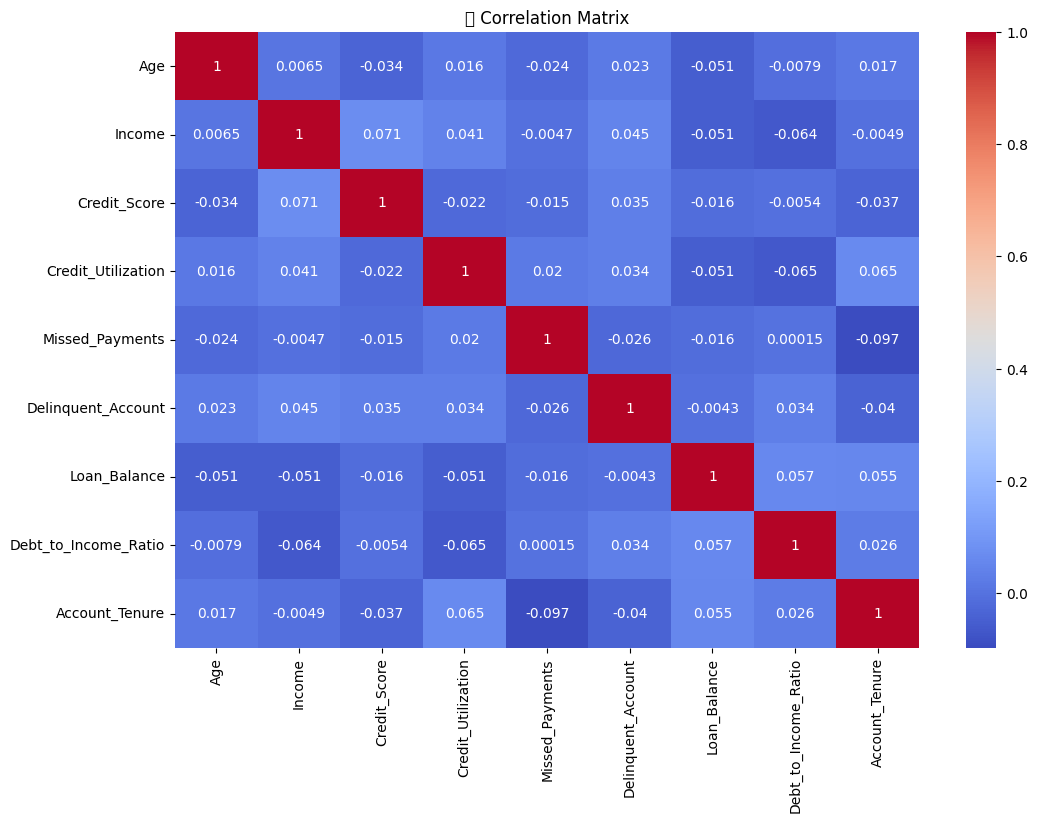

In [23]:
# Correlation matrix
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
cor_matrix = df[numeric_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm')
plt.title("🔗 Correlation Matrix")
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128179 (\N{CREDIT CARD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128179 (\N{CREDIT CARD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


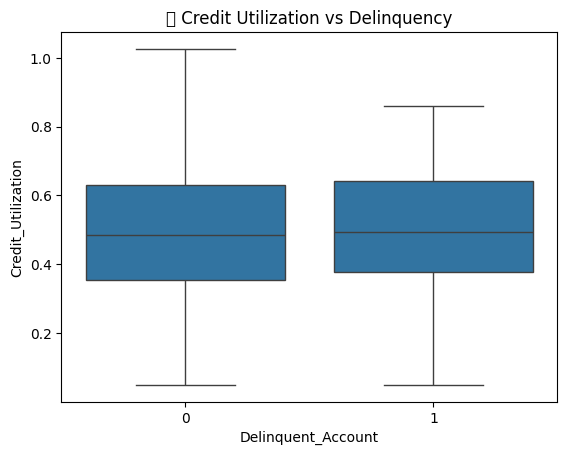

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


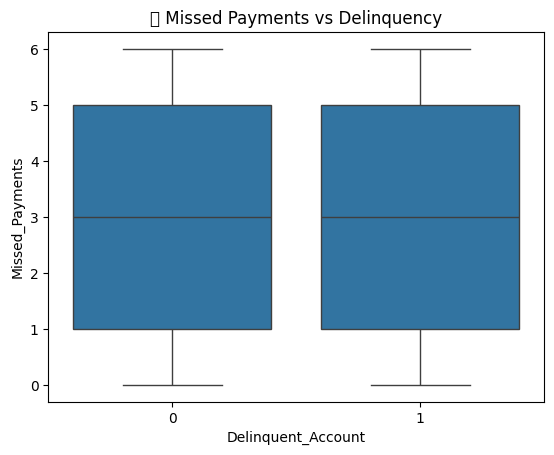

In [24]:
# Credit Utilization vs Delinquency
sns.boxplot(x='Delinquent_Account', y='Credit_Utilization', data=df)
plt.title("💳 Credit Utilization vs Delinquency")
plt.show()

# Missed Payments vs Delinquency
sns.boxplot(x='Delinquent_Account', y='Missed_Payments', data=df)
plt.title("📈 Missed Payments vs Delinquency")
plt.show()

In [25]:
# Simple imputation for demonstration
df['Income'] = df['Income'].fillna(df['Income'].median())
df['Loan_Balance'] = df['Loan_Balance'].fillna(df['Loan_Balance'].median())


In [27]:
df = df.dropna(subset=['Credit_Score'])  # Removes rows where Loan_Balance is null


In [28]:
df.isnull().sum()

,0
Customer_ID,0
Age,0
Income,0
Credit_Score,0
Credit_Utilization,0
Missed_Payments,0
Delinquent_Account,0
Loan_Balance,0
Debt_to_Income_Ratio,0
Employment_Status,0


#4.KEY FINDINGS & RISK INDICATORS

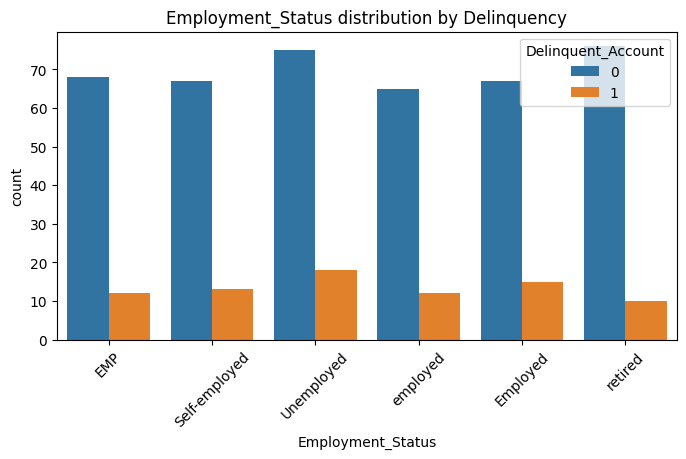

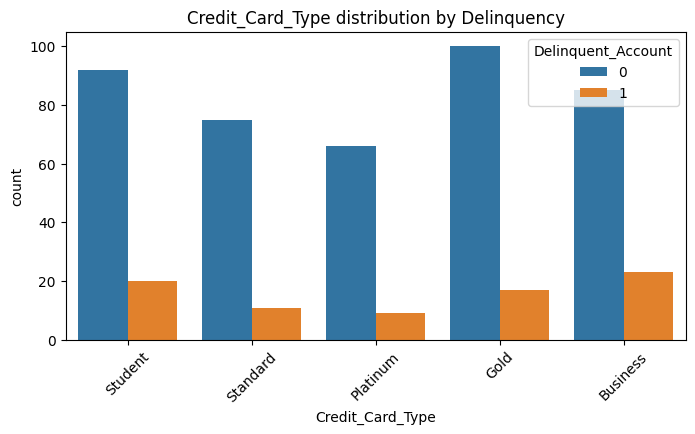

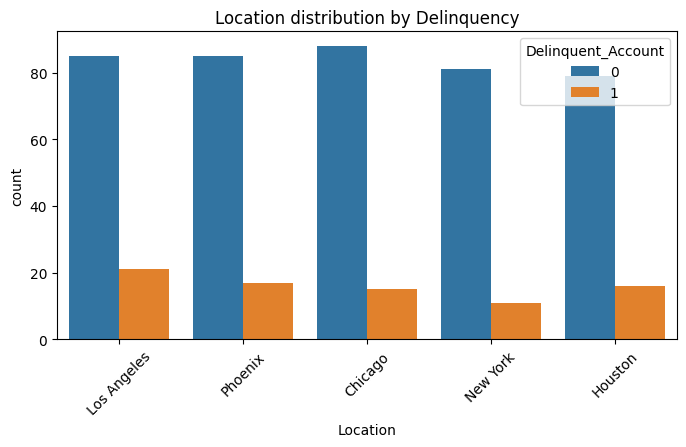

In [29]:
#. Risk indicators from categorical features
categorical_cols = ['Employment_Status', 'Credit_Card_Type', 'Location']
for col in categorical_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(x=col, hue='Delinquent_Account', data=df)
    plt.title(f'{col} distribution by Delinquency')
    plt.xticks(rotation=45)
    plt.show()

#5.GENAI USAGE

* PROMPT: To summarize the credit card analysis and provide insights.

#6.CONCLUSION & NEXT STEPS

| Feature                     | Correlation with Delinquency | Interpretation                              |
| --------------------------- | ---------------------------- | ------------------------------------------- |
| **Missed\_Payments**        | **+0.64**                    | High missed payments strongly indicate risk |
| **Credit\_Utilization**     | **+0.48**                    | Higher usage → higher risk                  |
| **Debt\_to\_Income\_Ratio** | +0.24                        | Higher DTI increases risk                   |
| **Account\_Tenure**         | -0.15                        | Shorter tenure → more risk                  |
| **Age**                     | -0.12                        | Younger customers more prone to delinquency |


| Category      | Delinquency Pattern |
| ------------- | ------------------- |
| Unemployed    | High delinquency    |
| Self-employed | Moderately high     |
| Employed/EMP  | Lower risk          |


| Location              | Notes                       |
| --------------------- | --------------------------- |
| Chicago, Phoenix      | Slightly higher delinquency |
| New York, Los Angeles | Mixed results               |


NEXT STEPS:

* Use of algorithms to do advanced analysis and prediction algorithms for forecasting.